<a href="https://colab.research.google.com/github/BandaAkshitha/Natural-Language-Processing/blob/main/NLP_lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Models

In [ ]:
!pip -q install gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import gensim.downloader as api

Load Models

In [9]:
# Load GloVe model
glove_model = api.load("glove-wiki-gigaword-100")

# Load Word2Vec model
w2v_model = api.load("word2vec-google-news-300")

print("GloVe Vocabulary size:", len(glove_model.key_to_index))
print("Word2Vec Vocabulary size:", len(w2v_model.key_to_index))

# Example vector
print("\nVector for 'king' (GloVe):\n", glove_model["king"])

[==================================================] 100.0% 1662.8/1662.8MB downloaded
GloVe Vocabulary size: 400000
Word2Vec Vocabulary size: 3000000

Vector for 'king' (GloVe):
 [-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752  

In [10]:
pairs = [
    ("doctor", "nurse"),
    ("cat", "dog"),
    ("car", "bus"),
    ("king", "queen"),
    ("boy", "girl"),
    ("apple", "banana"),
    ("teacher", "student"),
    ("india", "china"),
    ("computer", "laptop"),
    ("river", "water")
]

print("===== GloVe Word Similarities =====\n")

for w1, w2 in pairs:
    sim = glove_model.similarity(w1, w2)
    print(f"{w1} - {w2} : {sim:.4f}")


print("\n\n===== Word2Vec Word Similarities =====\n")

for w1, w2 in pairs:
    sim = w2v_model.similarity(w1, w2)
    print(f"{w1} - {w2} : {sim:.4f}")


===== GloVe Word Similarities =====

doctor - nurse : 0.7522
cat - dog : 0.8798
car - bus : 0.7373
king - queen : 0.7508
boy - girl : 0.9176
apple - banana : 0.5054
teacher - student : 0.8083
india - china : 0.5997
computer - laptop : 0.7024
river - water : 0.6306


===== Word2Vec Word Similarities =====

doctor - nurse : 0.6320
cat - dog : 0.7609
car - bus : 0.4693
king - queen : 0.6511
boy - girl : 0.8543
apple - banana : 0.5318
teacher - student : 0.6301
india - china : 0.3533
computer - laptop : 0.6640
river - water : 0.5769


In [11]:
test_words = ["king", "university", "computer", "india", "doctor"]

print("===== GloVe Nearest Words =====")

for word in test_words:
    print(f"\nTop similar words to '{word}' (GloVe):")
    for similar_word, score in glove_model.most_similar(word, topn=5):
        print(f"  {similar_word} ({score:.4f})")


print("\n\n===== Word2Vec Nearest Words =====")

for word in test_words:
    print(f"\nTop similar words to '{word}' (Word2Vec):")
    for similar_word, score in w2v_model.most_similar(word, topn=5):
        print(f"  {similar_word} ({score:.4f})")


===== GloVe Nearest Words =====

Top similar words to 'king' (GloVe):
  prince (0.7682)
  queen (0.7508)
  son (0.7021)
  brother (0.6986)
  monarch (0.6978)

Top similar words to 'university' (GloVe):
  college (0.8294)
  harvard (0.8156)
  yale (0.8114)
  professor (0.8104)
  graduate (0.7993)

Top similar words to 'computer' (GloVe):
  computers (0.8752)
  software (0.8373)
  technology (0.7642)
  pc (0.7366)
  hardware (0.7290)

Top similar words to 'india' (GloVe):
  pakistan (0.8370)
  indian (0.7802)
  delhi (0.7712)
  bangladesh (0.7662)
  lanka (0.7639)

Top similar words to 'doctor' (GloVe):
  physician (0.7673)
  nurse (0.7522)
  dr. (0.7175)
  doctors (0.7081)
  patient (0.7074)


===== Word2Vec Nearest Words =====

Top similar words to 'king' (Word2Vec):
  kings (0.7138)
  queen (0.6511)
  monarch (0.6413)
  crown_prince (0.6204)
  prince (0.6160)

Top similar words to 'university' (Word2Vec):
  universities (0.7004)
  faculty (0.6781)
  unversity (0.6758)
  undergraduate 

Words for Visualization

In [12]:
words = [
    # animals
    "cat","dog","lion","tiger","elephant","horse","monkey","zebra",

    # fruits
    "apple","banana","orange","mango","grape","pineapple","papaya",

    # countries/cities
    "india","china","japan","france","germany","delhi","mumbai","paris",

    # technology
    "computer","laptop","keyboard","mouse","internet","software","hardware",

    # people
    "king","queen","boy","girl","teacher","student"

    # education
    "university","college","professor","graduate","harvard","yale"
]


GRAPH 1 — GloVe t-SNE

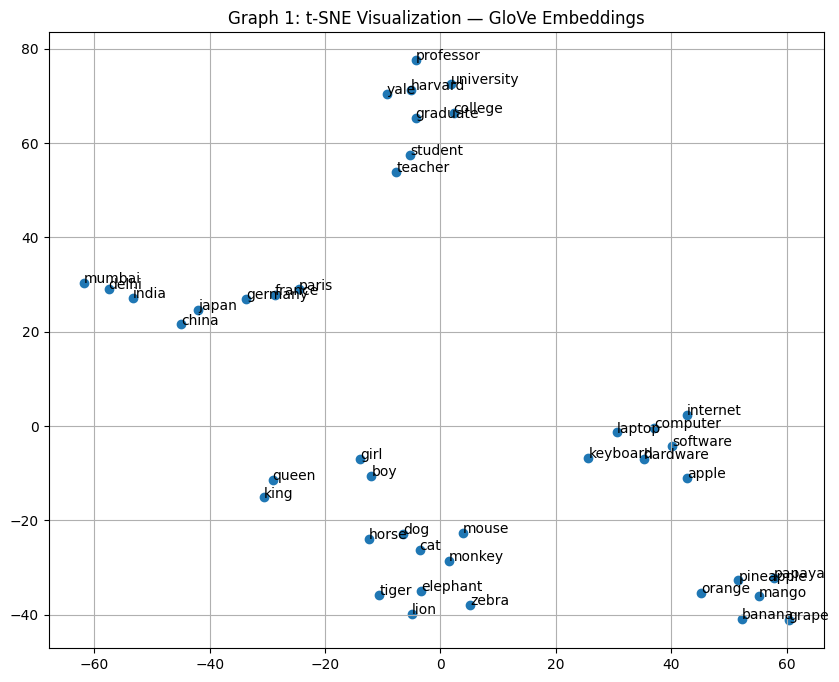

In [14]:
from sklearn.manifold import TSNE

words = [
    # animals
    "cat","dog","lion","tiger","elephant","horse","monkey","zebra",

    # fruits
    "apple","banana","orange","mango","grape","pineapple","papaya",

    # countries/cities
    "india","china","japan","france","germany","delhi","mumbai","paris",

    # technology
    "computer","laptop","keyboard","mouse","internet","software","hardware",

    # people
    "king","queen","boy","girl","teacher","student",

    # education
    "university","college","professor","graduate","harvard","yale"
]

glove_vectors = np.array([glove_model[word] for word in words])
tsne_glove = TSNE(
    n_components=2,
    random_state=42,
    perplexity=5,
    init="pca",
    learning_rate="auto"
)

glove_reduced = tsne_glove.fit_transform(glove_vectors)

plt.figure(figsize=(10,8))

x = glove_reduced[:,0]
y = glove_reduced[:,1]

plt.scatter(x, y)

for i, word in enumerate(words):
    plt.annotate(word, (x[i], y[i]))

plt.title("Graph 1: t-SNE Visualization — GloVe Embeddings")
plt.grid(True)
plt.show()

GRAPH 2 — Word2Vec t-SNE

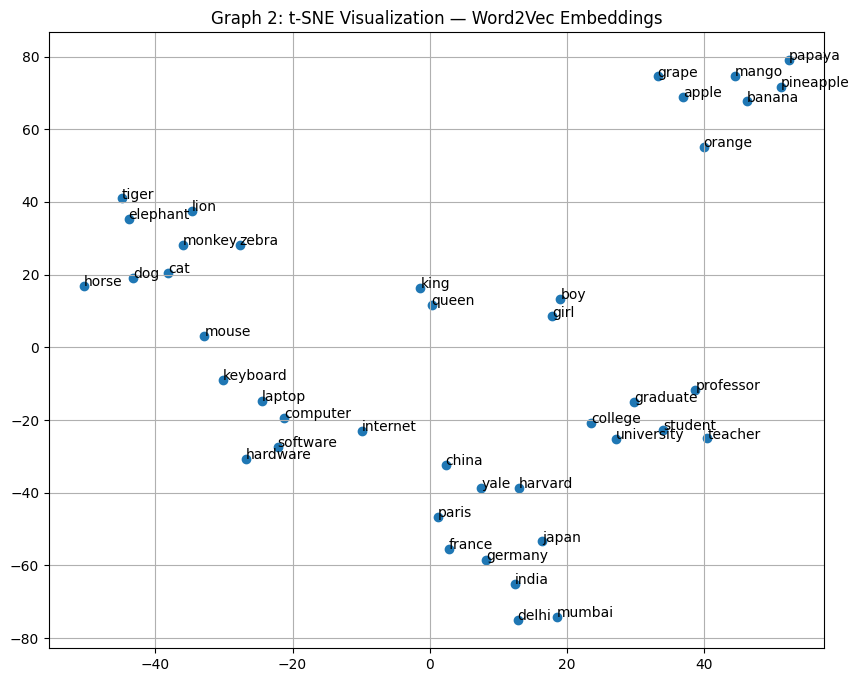

In [15]:
w2v_vectors = np.array([w2v_model[word] for word in words])

tsne_w2v = TSNE(
    n_components=2,
    random_state=42,
    perplexity=5,
    init="pca",
    learning_rate="auto"
)

w2v_reduced = tsne_w2v.fit_transform(w2v_vectors)

plt.figure(figsize=(10,8))

x = w2v_reduced[:,0]
y = w2v_reduced[:,1]

plt.scatter(x, y)

for i, word in enumerate(words):
    plt.annotate(word, (x[i], y[i]))

plt.title("Graph 2: t-SNE Visualization — Word2Vec Embeddings")
plt.grid(True)
plt.show()
